In [ ]:
import pandas as pd
data = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
print("First 5 rows:")
print(data.head())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [ ]:
print("\nData Information:")
print(data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
data['Age'] = data['Age'].fillna(method='ffill')
data['Age'] = data['Age'].fillna(method='bfill')

/tmp/ipython-input-5-3063011923.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Age'] = data['Age'].fillna(method='ffill')
/tmp/ipython-input-5-3063011923.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Age'] = data['Age'].fillna(method='bfill')


In [ ]:
data['Cabin'] = data['Cabin'].fillna("unknown", limit=5)

In [ ]:
data = data.drop_duplicates()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex_encoded'] = le.fit_transform(data['Sex'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Fare_scaled'] = scaler.fit_transform(data[['Fare']])

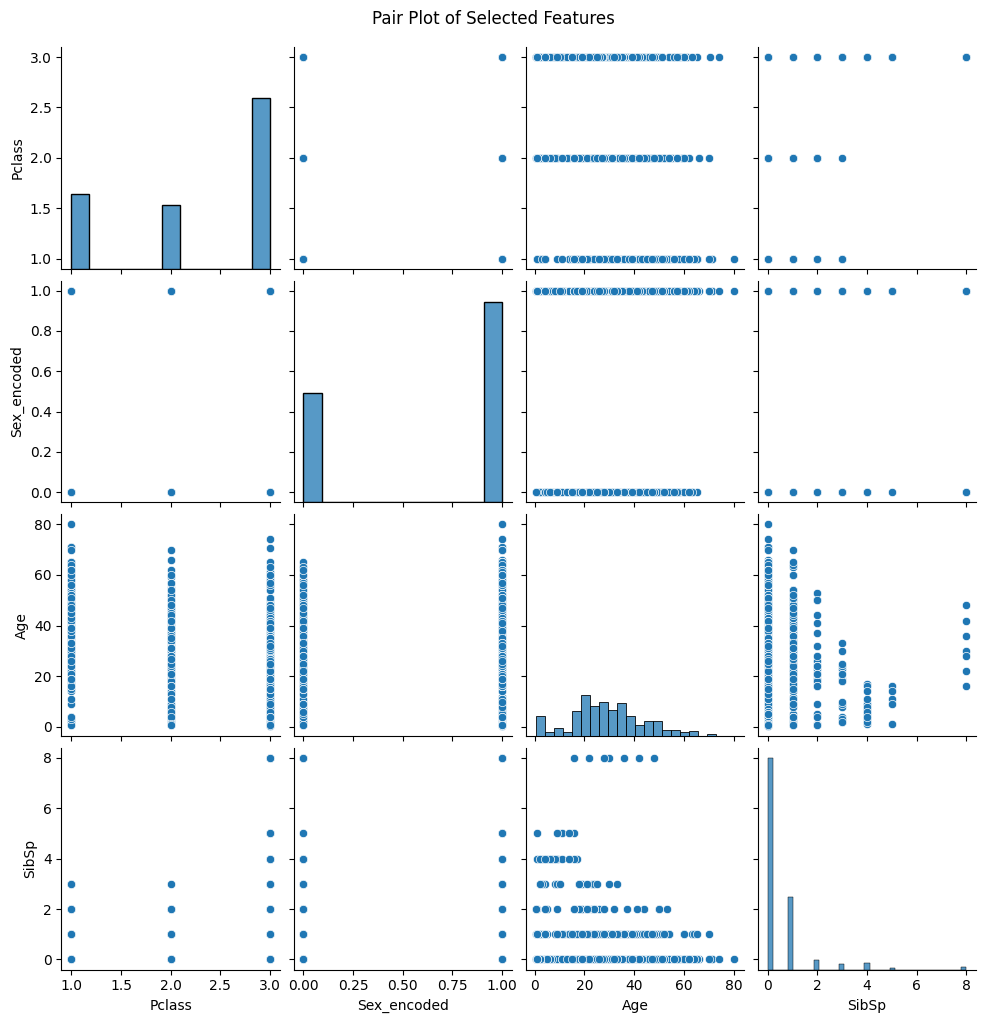

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
pairplot_cols = ['Pclass', 'Sex_encoded', 'Age', 'SibSp']
sns.pairplot(data[pairplot_cols].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

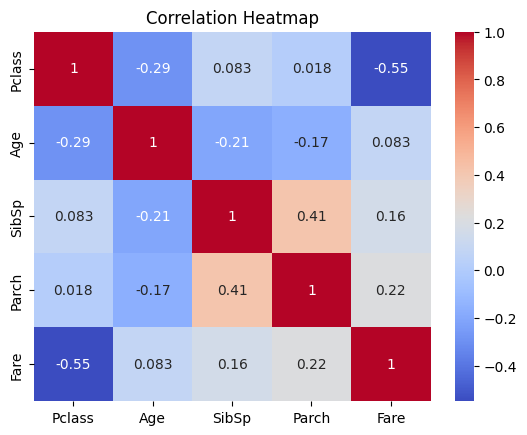

In [ ]:
corr_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = data[corr_cols].dropna().corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()